In [52]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


ModuleNotFoundError: No module named 'shap'

In [14]:
# Load the dataset

df_enrollment_data = pd.read_csv("Resources/data.csv", sep=';')

In [15]:
# Rename and clean columns

df_enrollment_data.rename(columns={
    'Daytime/evening attendance\t': 'Attendance (Evening/Daytime)',
    'Nacionality': 'Nationality',
    'Age at enrollment': 'Age at time of enrollment',
    'International': 'International Student'
}, inplace=True)

# Replace specific column names for semester results
df_enrollment_data.columns = (
    df_enrollment_data.columns
    .str.replace('1st sem', '- S1')
    .str.replace('2nd sem', '- S2')
)

In [18]:
# Create a target column called "random_tree_target"
df_enrollment_data['random_tree_target'] = df_enrollment_data['Target']

# Encode 'random_tree_target' if it's categorical
label_encoder = LabelEncoder()
df_enrollment_data['random_tree_target'] = label_encoder.fit_transform(df_enrollment_data['random_tree_target'])

# Display the mapping of encoded labels
print("Label Mapping:", dict(enumerate(label_encoder.classes_)))


Label Mapping: {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}


In [19]:
# Encode all other categorical columns
# Convert non-numerical columns (e.g., nationality, attendance) to numerical values using one-hot encoding or label encoding
df_encoded = pd.get_dummies(df_enrollment_data, drop_first=True)

In [20]:
# Define features (X) and target variable (y)
X = df_encoded.drop('random_tree_target', axis=1)  
y = df_encoded['random_tree_target']  

In [21]:
# Split the data into training and testing sets
# Use an 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,  # Reproducibility
    class_weight='balanced'  # Address class imbalance
)

In [24]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
# Evaluate feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

In [27]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
36,Target_Enrolled,0.362020
37,Target_Graduate,0.296900
30,Curricular units - S2 (approved),0.069137
24,Curricular units - S1 (approved),0.046507
31,Curricular units - S2 (grade),0.043842
16,Tuition fees up to date,0.023972
25,Curricular units - S1 (grade),0.023601
29,Curricular units - S2 (evaluations),0.013870
19,Age at time of enrollment,0.012356
23,Curricular units - S1 (evaluations),0.010210


In [28]:
# Display the top 10 most important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

Top 10 Important Features:
                                Feature  Importance
36                      Target_Enrolled    0.362020
37                      Target_Graduate    0.296900
30     Curricular units - S2 (approved)    0.069137
24     Curricular units - S1 (approved)    0.046507
31        Curricular units - S2 (grade)    0.043842
16              Tuition fees up to date    0.023972
25        Curricular units - S1 (grade)    0.023601
29  Curricular units - S2 (evaluations)    0.013870
19            Age at time of enrollment    0.012356
23  Curricular units - S1 (evaluations)    0.010210


In [29]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [30]:
# Evaluate the model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       442

    accuracy                           1.00       885
   macro avg       1.00      1.00      1.00       885
weighted avg       1.00      1.00      1.00       885



In [31]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[284   0   0]
 [  0 159   0]
 [  0   0 442]]


/var/folders/gp/fb89f3850h9fp_n96ycvw9380000gn/T/ipykernel_40846/2367574844.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='random_tree_target', data=df_enrollment_data, palette='viridis')


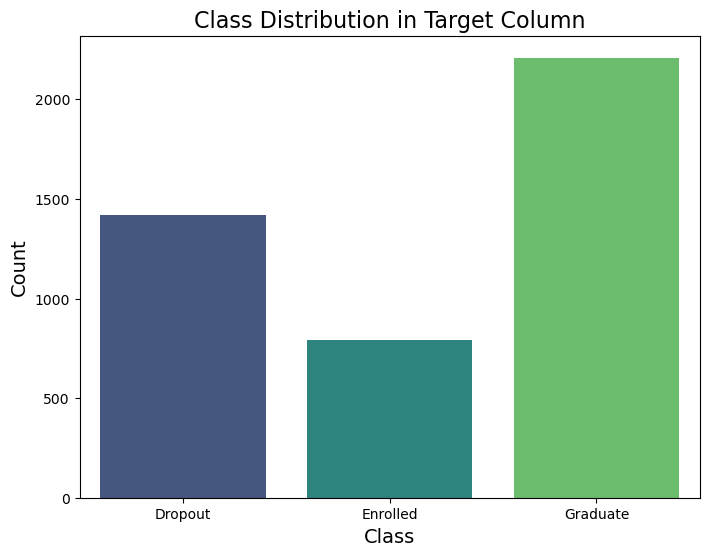

In [32]:
# Plot the class distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='random_tree_target', data=df_enrollment_data, palette='viridis')
plt.title('Class Distribution in Target Column', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=label_encoder.classes_)  # Replace with actual labels
plt.show()

/var/folders/gp/fb89f3850h9fp_n96ycvw9380000gn/T/ipykernel_40846/2636323061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


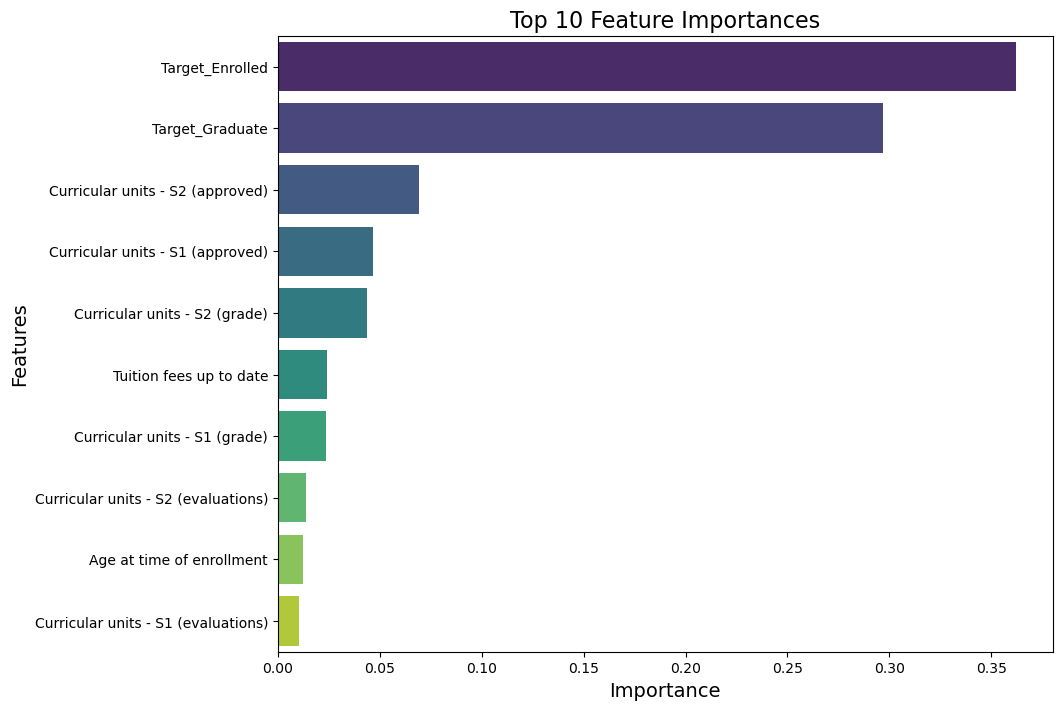

In [33]:
# Plot feature importance

plt.figure(figsize=(10, 8))
sns.barplot(
    x=feature_importance_df['Importance'][:10], 
    y=feature_importance_df['Feature'][:10], 
    palette='viridis'
)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
# Display the confusion matrix as a heatmapplt.show()

<Figure size 800x600 with 0 Axes>

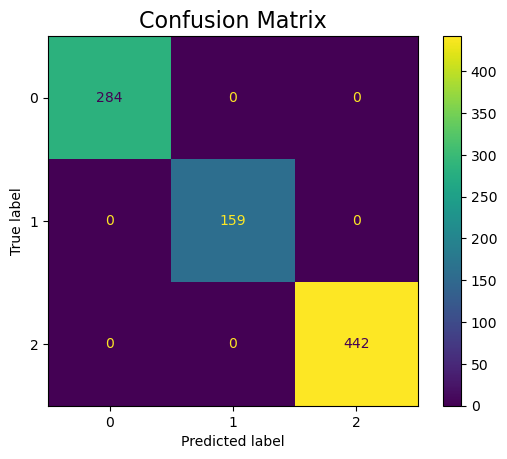

In [34]:
# Display the confusion matrix as a heatmap

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='viridis', values_format='d')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

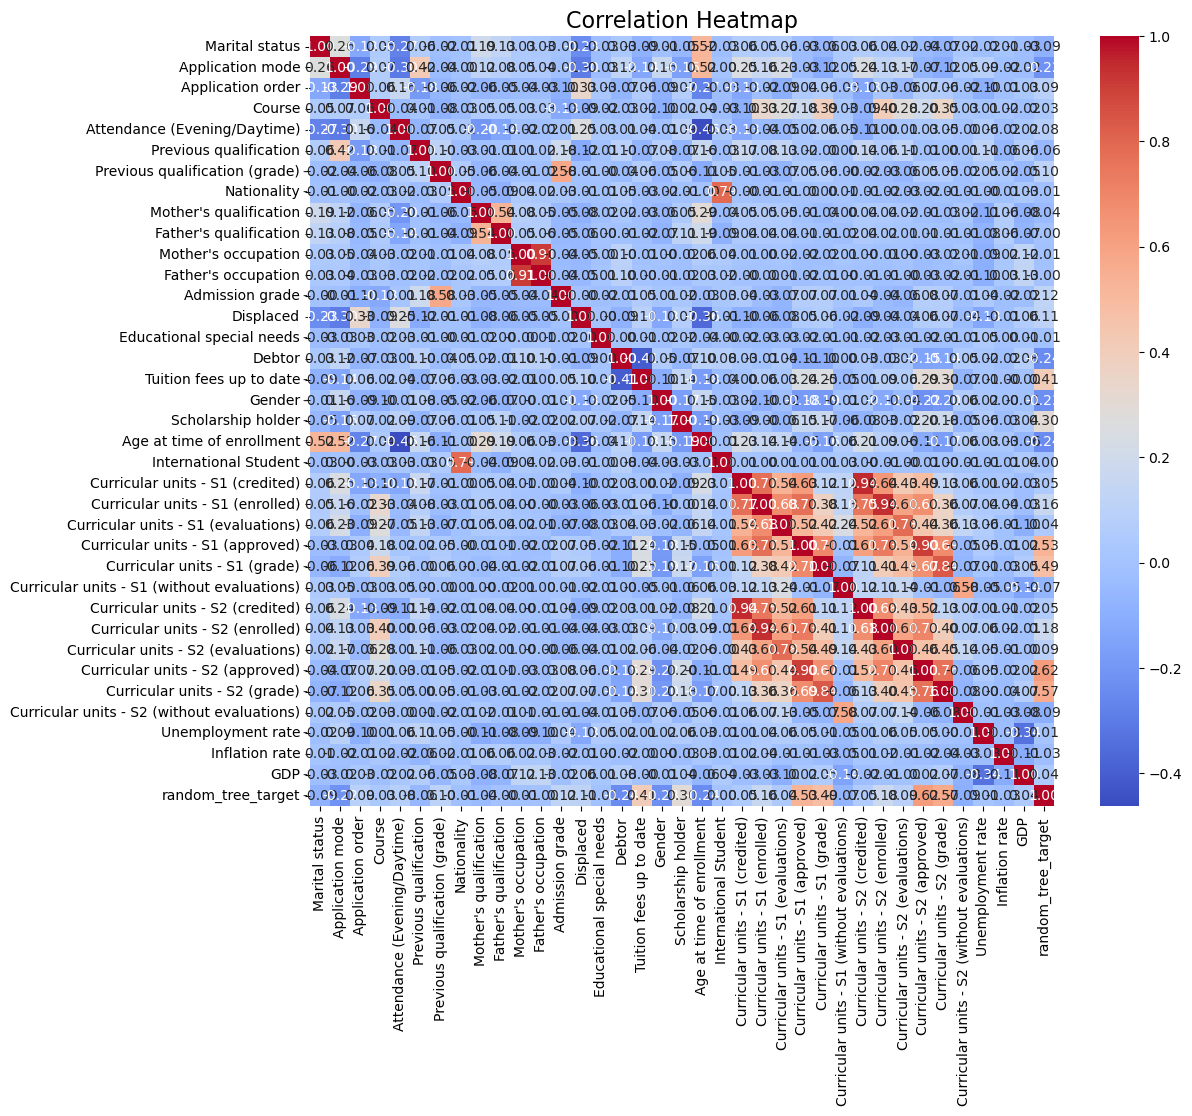

In [37]:
# Calculate correlation matrix

# Select only numeric columns for correlation calculation
numeric_data = df_enrollment_data.select_dtypes(include=['number'])

# Calculate the correlation matrix using only numeric columns
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

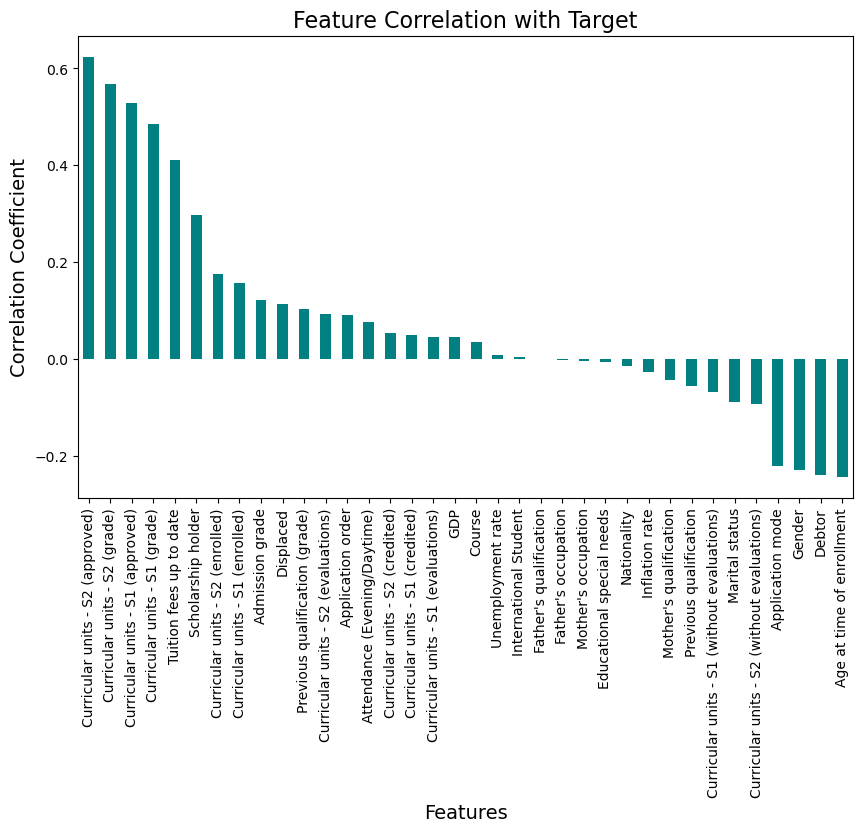

In [40]:
# Correlation of features with the target
correlation_with_target = numeric_data.corr()['random_tree_target'].sort_values(ascending=False)

# Plot correlation
plt.figure(figsize=(10, 6))
correlation_with_target.drop('random_tree_target').plot(kind='bar', color='teal')
plt.title('Feature Correlation with Target', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.show()


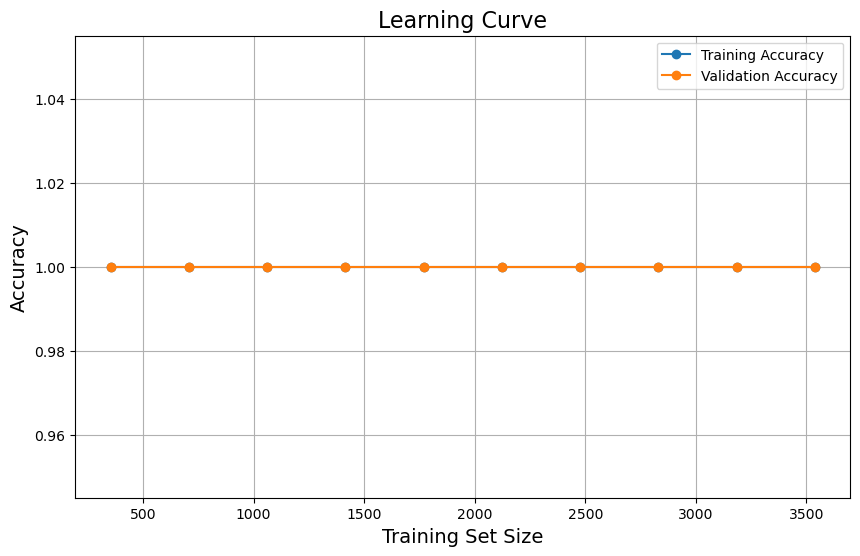

In [49]:
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and std for train/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning Curve', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid()
plt.show()



Takeaways from the Classification Report:

Perfect Scores Across All Metrics:
Precision, Recall, and F1-Score for all classes (0, 1, 2) are 1.00 (100%), indicating that the model has perfectly predicted all instances in the dataset.

Accuracy:
The overall accuracy of the model is 100%, meaning every single prediction matched the true label.